In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

print('[INFO]', tf.config.experimental.list_logical_devices())

2.10.0
[INFO] [LogicalDevice(name='/device:CPU:0', device_type='CPU')]


In [3]:
import wandb
from wandb.keras import WandbCallback

wandb.login()

wandb: Currently logged in as: p-leroy. Use `wandb login --relogin` to force relogin


True

In [4]:
from helper_functions import CreateAugment, dice_coef, InpaintingModel

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid

In [6]:
# CIFAR 10 Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print('x_train.shape ', x_train.shape)
print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

x_train.shape  (50000, 32, 32, 3)
50000  train samples
10000  test samples


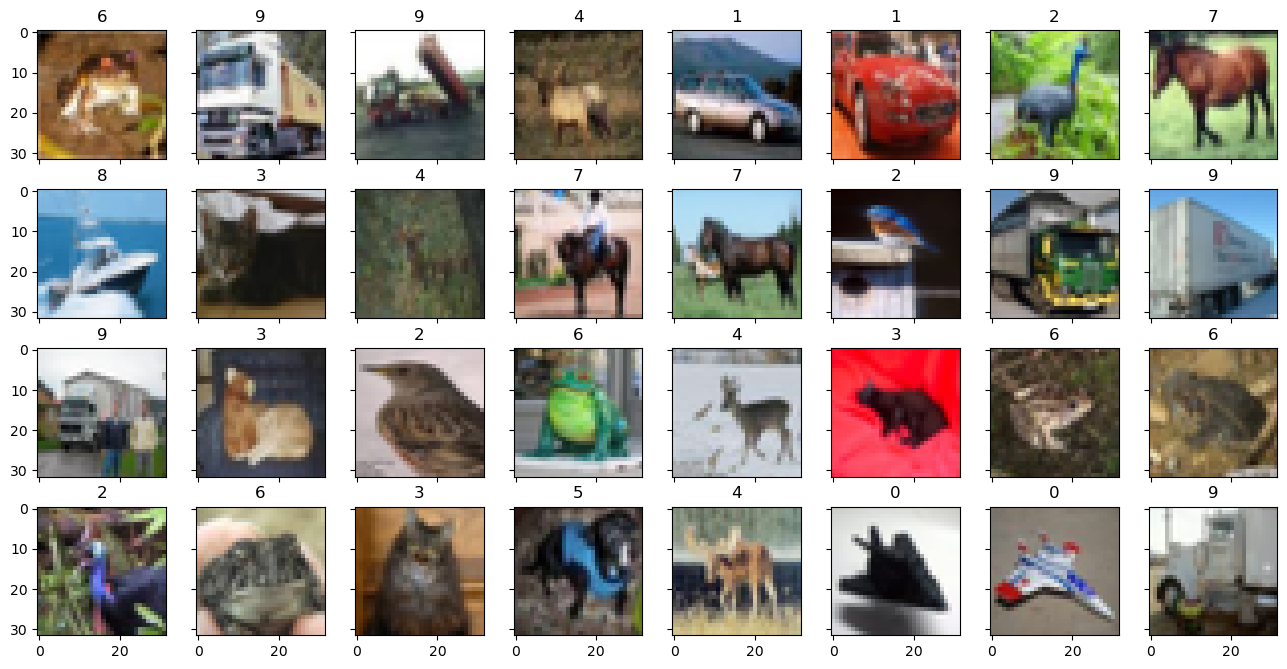

In [7]:
# Get first 32 images as samples
sample_images = x_train[:32]
sample_labels = y_train[:32]

fig = plt.figure(figsize=(16., 8.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 8),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )

for ax, image, label in zip(grid, sample_images, sample_labels):
    ax.imshow(image)
    ax.set_title(label[0])

plt.show()

In [8]:
traingen = CreateAugment(x_train, x_train)
testgen = CreateAugment(x_test, x_test, shuffle=False)

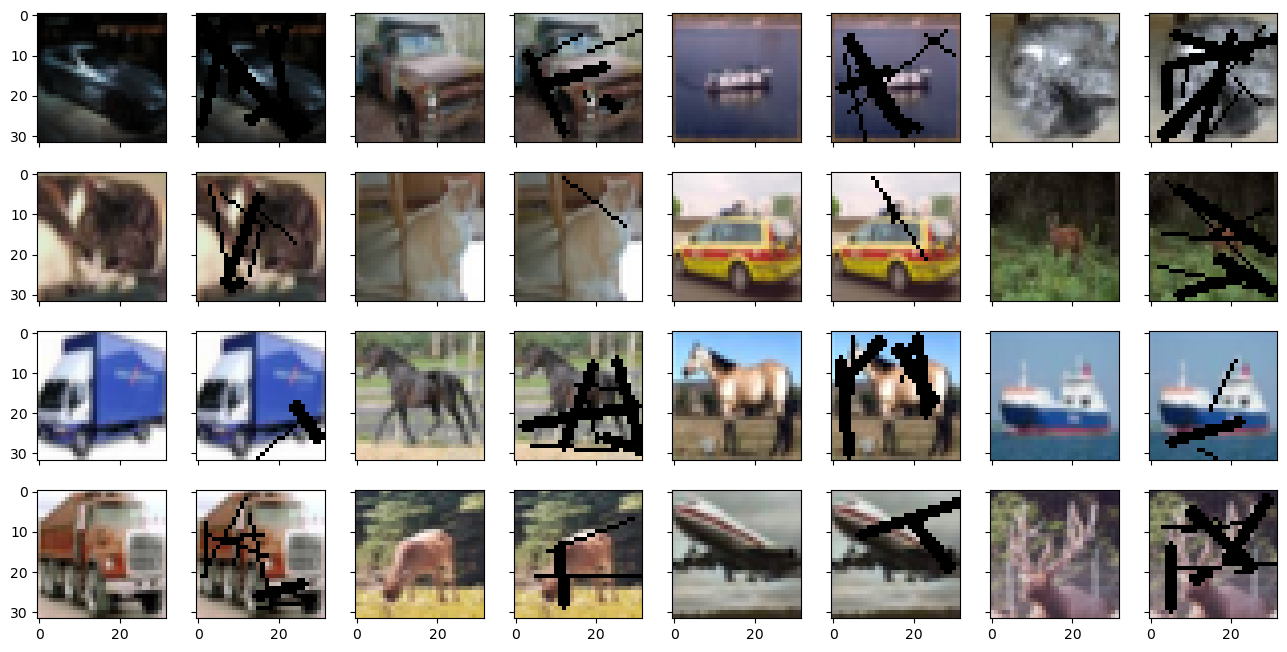

In [9]:
# Examples
sample_idx = 90

sample_masks, sample_labels = traingen[sample_idx]
sample_images = [None] * (len(sample_masks) + len(sample_labels))
sample_images[::2] = sample_labels
sample_images[1::2] = sample_masks

fig = plt.figure(figsize=(16., 8.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 8),
                 axes_pad=0.3,
                 )

for ax, image in zip(grid, sample_images):
    ax.imshow(image)

plt.show()

# Autoencoder-Decoder Model

In [10]:
keras.backend.clear_session()
model = InpaintingModel().prepare_model()
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[dice_coef])
keras.utils.plot_model(model, show_shapes=True, dpi=76, to_file='model_v1.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.
